

## Company Characteristics

#### Company Size vs. Job Offerings: Investigate whether larger companies post more job openings than smaller companies.
#### Follower Count Analysis: Investigate whether companies with higher follower counts tend to have more job postings or better salaries.

In [2]:
import pandas as pd

# Load the datasets
postings = pd.read_csv('updated_data\postings.csv')
companies = pd.read_csv('updated_data\company.csv')
company_industries = pd.read_csv('updated_data\company_industries.csv')
company_specialities = pd.read_csv('updated_data\company_specialities.csv')
employee_counts = pd.read_csv('updated_data\employee_counts.csv')
salaries = pd.read_csv('updated_data\salaries.csv')
job_skills = pd.read_csv('updated_data\Job_skills.csv')
job_industries = pd.read_csv('updated_data\modified_job_industries.csv')
skills = pd.read_csv('updated_data\skills.csv')
industries = pd.read_csv('updated_data\industries.csv')
# benefits = pd.read_csv('updated_data\benefits.csv')



In [3]:
postings = postings.astype({
    'job_id': 'int32',
    'company_name': 'string',    # Use 'string' for modern text processing (like VARCHAR)
    'title': 'string',
    'description': 'string',
    'pay_period': 'string',
    'location': 'string',
    'company_id': 'int32',
    'views': 'int32',
    'formatted_work_type': 'string',
    'applies': 'int32',
    'job_posting_url': 'string',
    'work_type': 'string',
    'normalized_salary': 'float',
    'zip_code': 'string',
    'fips': 'int32'
})

In [4]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                35564 non-null  int32  
 1   company_name          35564 non-null  string 
 2   title                 35564 non-null  string 
 3   description           35564 non-null  string 
 4   pay_period            35564 non-null  string 
 5   location              35564 non-null  string 
 6   company_id            35564 non-null  int32  
 7   views                 35564 non-null  int32  
 8   formatted_work_type   35564 non-null  string 
 9   applies               35564 non-null  int32  
 10  original_listed_time  35564 non-null  object 
 11  remote_allowed        35564 non-null  bool   
 12  job_posting_url       35564 non-null  string 
 13  expiry                35564 non-null  object 
 14  listed_time           35564 non-null  object 
 15  work_type          

In [5]:
employee_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   company_id      35787 non-null  int64
 1   employee_count  35787 non-null  int64
 2   follower_count  35787 non-null  int64
 3   time_recorded   35787 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


In [8]:
company_postings = postings.groupby(['company_id', 'company_name']).size().reset_index(name='job_posting_count')
company_postings

,company_id,company_name,job_posting_count
0,1009,IBM,32
1,1016,GE HealthCare,9
2,1025,Hewlett Packard Enterprise,11
3,1028,Oracle,57
4,1033,Accenture,9
...,...,...,...
10352,103426165,JPM Financial LLC,1
10353,103432741,Patriot Wings,1
10354,103453650,Souvlaki,1
10355,103456466,Foundation Model Startup,1


In [10]:
# Step 1: Sort by `company_id` and `time_recorded` to get the most recent record at the top for each company
employee_counts_sorted = employee_counts.sort_values(['company_id', 'time_recorded'], ascending=[True, False])
employee_counts_sorted

,company_id,employee_count,follower_count,time_recorded
30056,1009,311223,16314846,1713501255
19166,1009,313147,16309985,1713402495
17786,1009,313142,16309464,1713392385
2617,1009,314102,16253625,1712378162
35604,1016,57001,2196350,1713569031
...,...,...,...,...
32638,103463217,0,21,1713552037
32448,103466352,0,0,1713550651
32948,103467540,0,12,1713554225
31417,103468936,0,1,1713535939


In [11]:
# Step 2: Drop duplicates so we keep only the most recent record for each company_id
latest_employee_counts = employee_counts_sorted.drop_duplicates(subset=['company_id'], keep='first')
latest_employee_counts

,company_id,employee_count,follower_count,time_recorded
30056,1009,311223,16314846,1713501255
35604,1016,57001,2196350,1713569031
21766,1025,79559,3588329,1713453258
32109,1028,191374,9497909,1713540073
35631,1033,565191,11890321,1713569451
...,...,...,...,...
32638,103463217,0,21,1713552037
32448,103466352,0,0,1713550651
32948,103467540,0,12,1713554225
31417,103468936,0,1,1713535939


In [17]:
# Step 3: Merge postings with the filtered employee_counts DataFrame
postings_with_employee_count = company_postings.merge(latest_employee_counts[['company_id', 'employee_count']], on='company_id', how='left')
postings_with_employee_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_id         10357 non-null  int32  
 1   company_name       10357 non-null  string 
 2   job_posting_count  10357 non-null  int64  
 3   employee_count     10356 non-null  float64
dtypes: float64(1), int32(1), int64(1), string(1)
memory usage: 283.3 KB


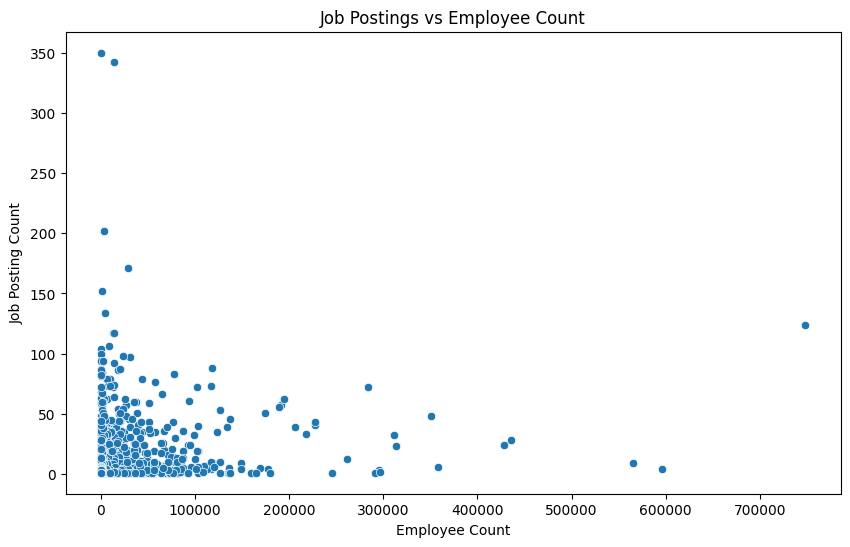

Correlation coefficient between employee count and job posting count: 0.24
Average job postings by company size:
company_size
Small         1.543438
Medium        2.604225
Large         3.932453
Very Large    9.537788
Name: job_posting_count, dtype: float64


C:\Users\My Account\AppData\Local\Temp\ipykernel_2084\323504827.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_job_postings_by_size = postings_with_employee_count.groupby('company_size')['job_posting_count'].mean()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=postings_with_employee_count, x='employee_count', y='job_posting_count')
plt.title('Job Postings vs Employee Count')
plt.xlabel('Employee Count')
plt.ylabel('Job Posting Count')
plt.show()

# Step 2: Calculate the correlation coefficient
correlation = postings_with_employee_count['employee_count'].corr(postings_with_employee_count['job_posting_count'])
print(f"Correlation coefficient between employee count and job posting count: {correlation:.2f}")

# Step 3: Categorize companies by size and calculate average job postings for each group
# Defining size categories (you can adjust these thresholds)
bins = [0, 50, 500, 5000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'Very Large']
postings_with_employee_count['company_size'] = pd.cut(postings_with_employee_count['employee_count'], bins=bins, labels=labels)

# Calculate average job postings by company size
avg_job_postings_by_size = postings_with_employee_count.groupby('company_size')['job_posting_count'].mean()
print("Average job postings by company size:")
print(avg_job_postings_by_size)


In [20]:
fig = px.scatter(
    postings_with_employee_count,
    x="employee_count",
    y="job_posting_count",
    size="employee_count",
    color="company_size",
    hover_name="company_name",
    title="Job Postings vs Employee Count by Company Size",
    labels={"employee_count": "Employee Count", "job_posting_count": "Job Posting Count"},
    size_max=50
)

# Show the plot
fig.show()


In [24]:
merged_df = company_postings.merge(latest_employee_counts[['company_id', 'follower_count']], on='company_id', how='left')
merged_df


,company_id,company_name,job_posting_count,follower_count
0,1009,IBM,32,16314846.0
1,1016,GE HealthCare,9,2196350.0
2,1025,Hewlett Packard Enterprise,11,3588329.0
3,1028,Oracle,57,9497909.0
4,1033,Accenture,9,11890321.0
...,...,...,...,...
10352,103426165,JPM Financial LLC,1,3.0
10353,103432741,Patriot Wings,1,11.0
10354,103453650,Souvlaki,1,2.0
10355,103456466,Foundation Model Startup,1,17.0


In [25]:
# Calculate correlation between follower_count and job_posting_count
correlation = merged_df[['job_posting_count', 'follower_count']].corr().iloc[0, 1]
print(f"Correlation between follower count and job postings: {correlation:.2f}")


Correlation between follower count and job postings: 0.24


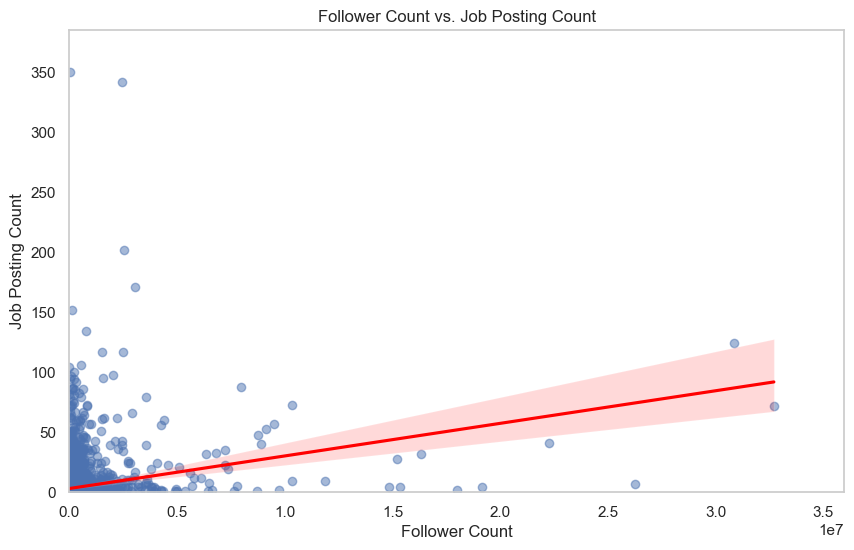

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='follower_count', y='job_posting_count', data=merged_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Follower Count vs. Job Posting Count')
plt.xlabel('Follower Count')
plt.ylabel('Job Posting Count')
plt.xlim(0, merged_df['follower_count'].max() * 1.1)  # Adjusting x-axis limits for better visualization
plt.ylim(0, merged_df['job_posting_count'].max() * 1.1)  # Adjusting y-axis limits for better visualization
plt.grid()
plt.show()
